In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [5]:
df['TARGET CLASS'].value_counts(normalize=True)

1    0.5
0    0.5
Name: TARGET CLASS, dtype: float64

# Modelling

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
feature=df.drop(['TARGET CLASS'], axis=1)
target=df['TARGET CLASS']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=101)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors=3)

In [11]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

# Evaluation

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [13]:
prediction = model.predict(X_test)

In [14]:
pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Predict 0', 'Predict 1'], index = ['actual 0', 'actual 1'])

,Predict 0,Predict 1
actual 0,100,6
actual 1,7,87


In [15]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       106
           1       0.94      0.93      0.93        94

   micro avg       0.94      0.94      0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



# Finding the best K

In [16]:
prediction

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [17]:
acc= []
k = []
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors=item)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    acc.append(accuracy)
    k.append(item)

In [18]:
pd.DataFrame({'K':k, 'Accuracy':acc}).sort_values(by=['Accuracy'], ascending=False).head()

,K,Accuracy
30,31,0.955
15,16,0.955
26,27,0.955
28,29,0.955
33,34,0.955


# KNN With n_neighbors=16

In [19]:
model=KNeighborsClassifier(n_neighbors=16)

In [20]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [21]:
prediction_1 = model.predict(X_test)

In [22]:
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        94

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



# Breast Cancer Case

In [23]:
from sklearn.datasets import load_breast_cancer

In [24]:
data=load_breast_cancer()

In [25]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['target'])['target'].map({0:'malignant', 1:'benign'})

In [27]:
y.value_counts(normalize=True)

benign       0.627417
malignant    0.372583
Name: target, dtype: float64

# Modelling Without Standarize Features

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [29]:
model_cancer = KNeighborsClassifier(n_neighbors=3)

In [30]:
model_cancer.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

# Evaluation

In [31]:
prediction = model_cancer.predict(X_test)

In [32]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      benign       0.92      0.97      0.95        72
   malignant       0.95      0.86      0.90        42

   micro avg       0.93      0.93      0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



# Standarize the Features

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
data_scaled = scaler.fit_transform(x)

In [36]:
x_scaled=pd.DataFrame(data_scaled, columns=x.columns)

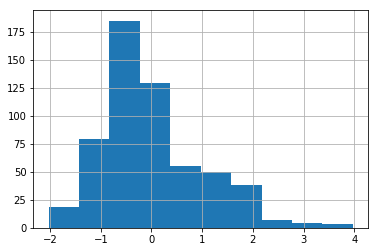

In [37]:
x_scaled['mean radius'].hist()

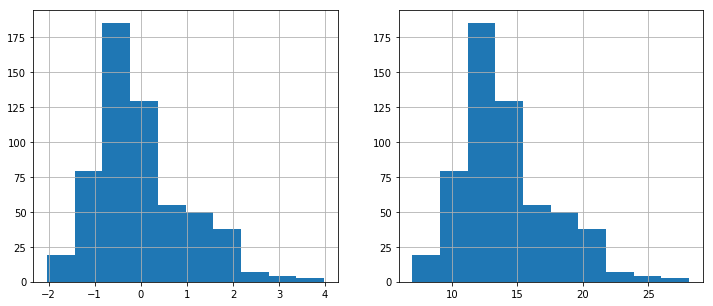

In [38]:
fig, ax= plt.subplots(nrows=1,ncols=2, figsize=(12,5))
x_scaled['mean radius'].hist(ax=ax[0])
x['mean radius'].hist(ax=ax[1])

# Modelling with standarize features

In [39]:
model_scaled = KNeighborsClassifier(n_neighbors=3)

In [40]:
X_train, X_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.2, random_state=101)

In [41]:
model_scaled.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

# Evaluation

In [42]:
prediction = model_scaled.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        72
   malignant       0.97      0.90      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Finding the best K -scaled

In [43]:
acc= []
k = []
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors=item)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    acc.append(accuracy)
    k.append(item)

In [44]:
pd.DataFrame({'K':k, 'Accuracy':acc}).sort_values(by=['Accuracy'], ascending=False).head()

,K,Accuracy
10,11,0.973684
12,13,0.973684
9,10,0.964912
4,5,0.964912
5,6,0.964912


In [45]:
model_scaled_best = KNeighborsClassifier(n_neighbors=11)

In [46]:
model_scaled_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [47]:
prediction = model_scaled_best.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98        72
   malignant       0.98      0.95      0.96        42

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



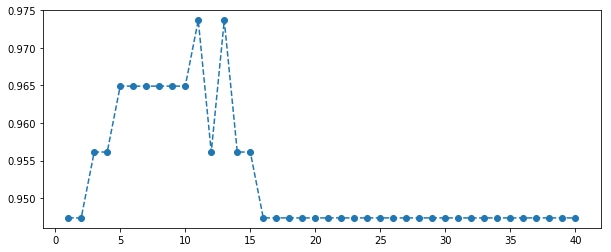

In [48]:
plt.figure(figsize=(10,4))
plt.plot(k,acc,linestyle='dashed',marker='o')